## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
#pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [153]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [154]:
churn = pd.read_csv("~/Downloads/BankChurners.csv")

## Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [155]:
# Checking the number of rows and columns in the training data
churn.shape ##  Complete the code to view dimensions of the train data

(10127, 21)

In [156]:
# let's create a copy of the data
data = churn.copy()

### Displaying the first few rows of the dataset

In [157]:
# let's view the first 5 rows of the data
data.head() ##  Complete the code to view top 5 rows of the data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Cu...,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Cu...,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Cu...,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Cu...,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Cu...,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [158]:
# let's view the last 5 rows of the data
data.tail() ##  Complete the code to view last 5 rows of the data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Cu...,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Cu...,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Cu...,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Cu...,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Cu...,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


### Checking the data types of the columns for the dataset

In [159]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### Observation ###

1. We can see the dataset contains mix of integers and objects. We might require in the future to change the objects to either categorical or integer depends on the data

### Checking for duplicate values

In [160]:
# let's check for duplicate values in the data
data.nunique() ##  Complete the code to check duplicate entries in the data

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

### Checking for missing values

In [161]:
# let's check for missing values in the data
data.isnull().sum() ##  Complete the code to check missing entries in the train data

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

### Observations ###

1. The Education Level and Marital Level have missing values we might use simple Imputer to either use the Median or Mean from the column


### Statistical summary of the dataset

In [162]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T ##  Complete the code to print the statitical summary of the train data

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


In [163]:
data.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Cu...,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


### Observations ###

1. Included the object to understand what are the top values and their frequency. 

In [164]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Unique values in Education_Level are :
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************
Unique values in Marital_Status are :
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************
Unique values in Income_Category are :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
**************************************************

In [165]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
data.drop(["CLIENTNUM"], axis=1, inplace=True)

In [166]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

### Observations ###

1. The attrition flag have existing customers and attrited customers, we would be giving 0 for existing and 1 for attrited customers to change the data type to caategorical in the future. 

## Exploratory Data Analysis

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [167]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [168]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [169]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [170]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis

`Customer_Age`

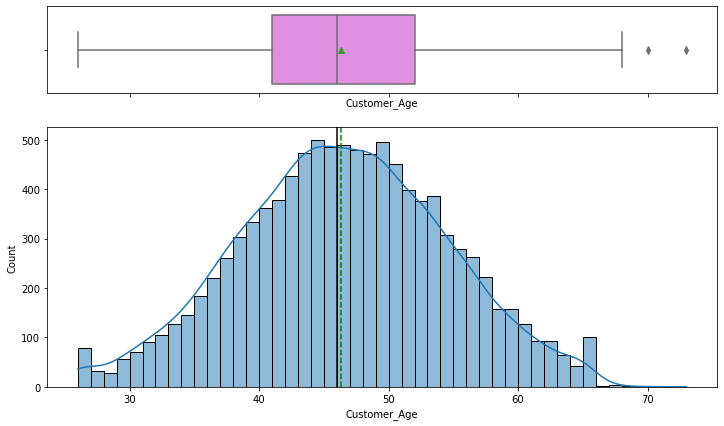

In [171]:
histogram_boxplot(data, "Customer_Age", kde=True)

`Months_on_book`

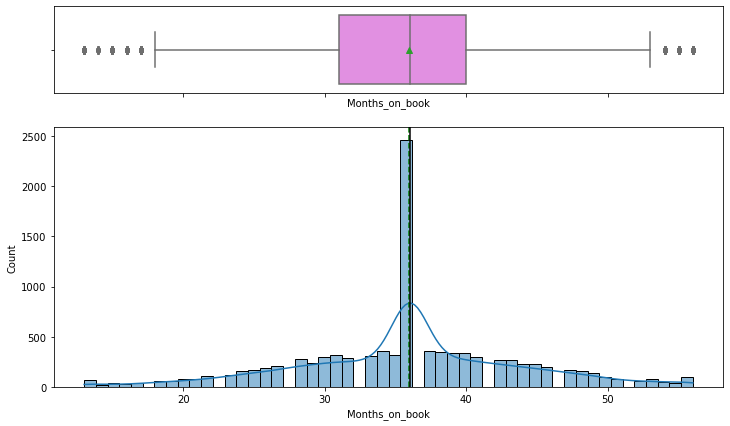

In [172]:
histogram_boxplot(data,'Months_on_book', kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

`Credit_Limit`

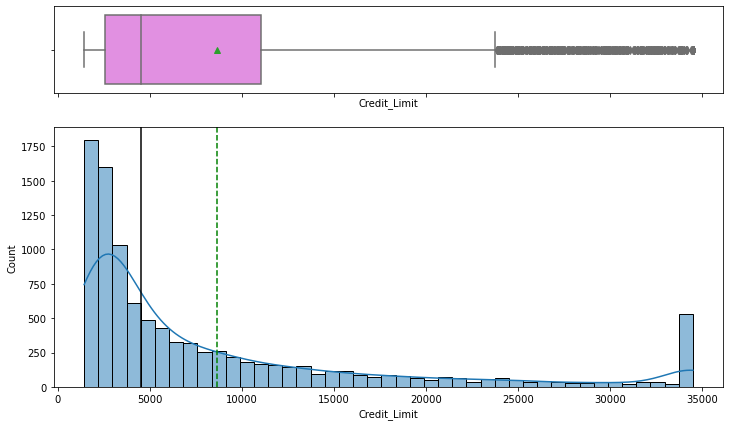

In [173]:
histogram_boxplot(data,"Credit_Limit",kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

`Total_Revolving_Bal`

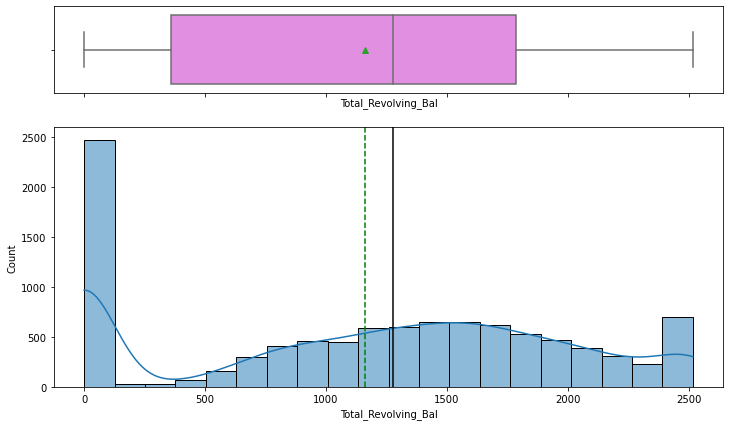

In [174]:
histogram_boxplot(data,'Total_Revolving_Bal',kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

`Avg_Open_To_Buy`

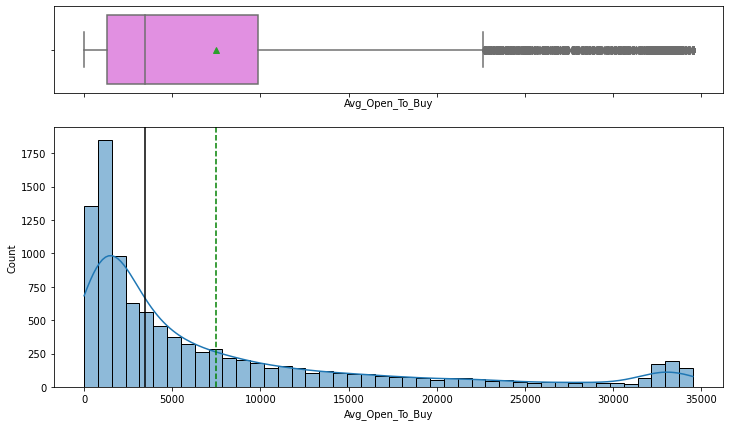

In [175]:
histogram_boxplot(data,'Avg_Open_To_Buy',kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

`Total_Trans_Ct`

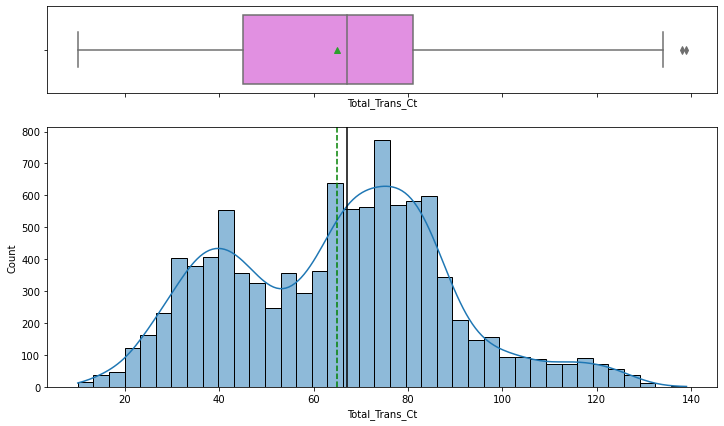

In [176]:
histogram_boxplot(data,'Total_Trans_Ct',kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

`Total_Amt_Chng_Q4_Q1`

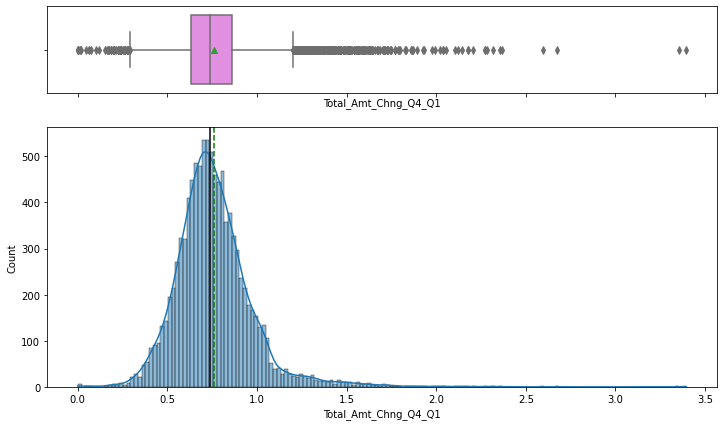

In [177]:
histogram_boxplot(data,'Total_Amt_Chng_Q4_Q1',kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

**Let's see total transaction amount distributed**

`Total_Trans_Amt`

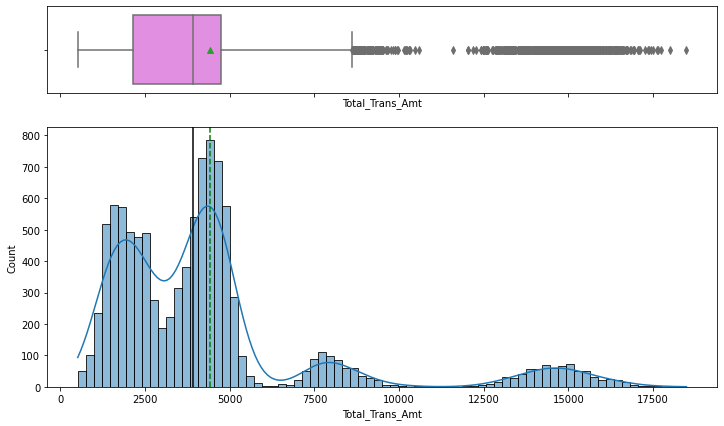

In [178]:
histogram_boxplot(data,'Total_Trans_Amt',kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

`Total_Ct_Chng_Q4_Q1`

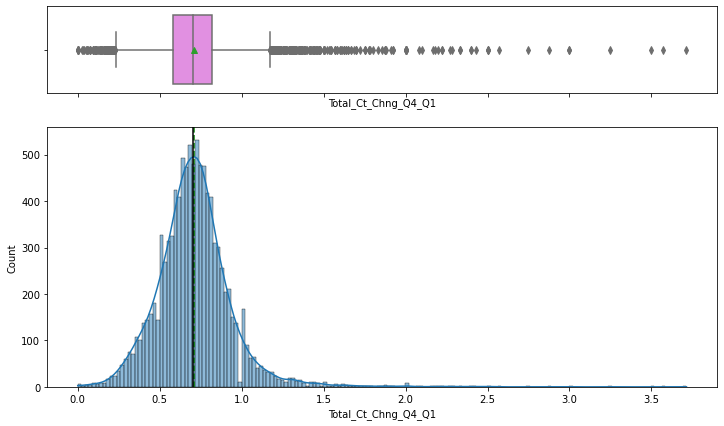

In [179]:
histogram_boxplot(data,'Total_Ct_Chng_Q4_Q1',kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

`Avg_Utilization_Ratio`

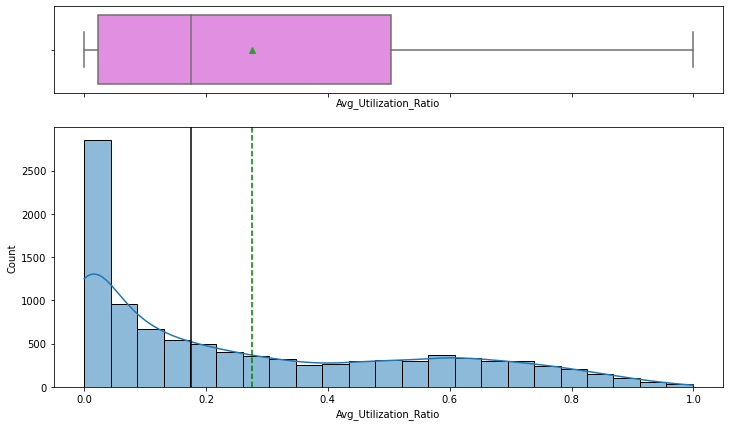

In [180]:
histogram_boxplot(data,'Avg_Utilization_Ratio',kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

`Dependent_count`

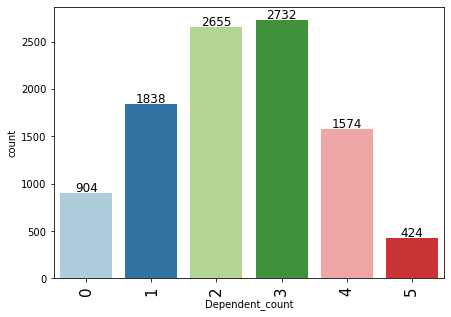

In [181]:
labeled_barplot(data, "Dependent_count")

`Total_Relationship_Count`

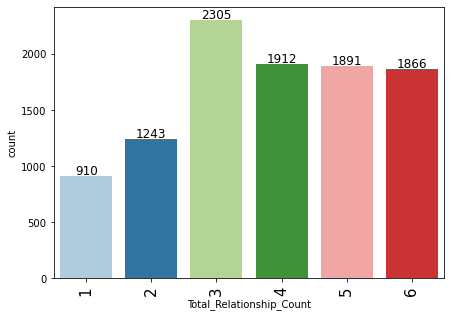

In [182]:
labeled_barplot(data,'Total_Relationship_Count') ## Complete the code to create labeled_barplot for 'Total_Relationship_Count'

`Months_Inactive_12_mon`

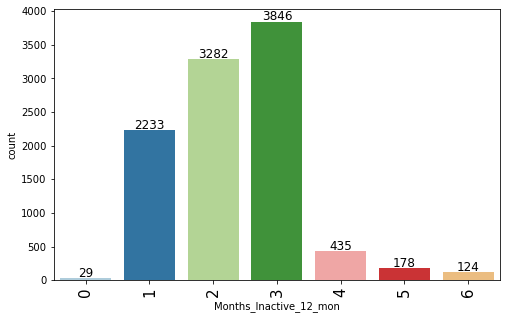

In [183]:
labeled_barplot(data,'Months_Inactive_12_mon') ## Complete the code to create labeled_barplot for 'Months_Inactive_12_mon'

`Contacts_Count_12_mon`

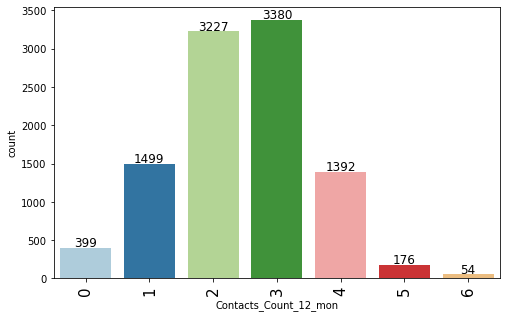

In [184]:
labeled_barplot(data,'Contacts_Count_12_mon') ## Complete the code to create labeled_barplot for 'Contacts_Count_12_mon'

`Gender`

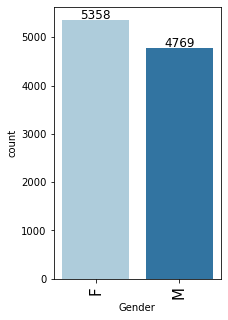

In [185]:
labeled_barplot(data,'Gender') ## Complete the code to create labeled_barplot for 'Gender'

**Let's see the distribution of the level of education of customers**

`Education_Level`

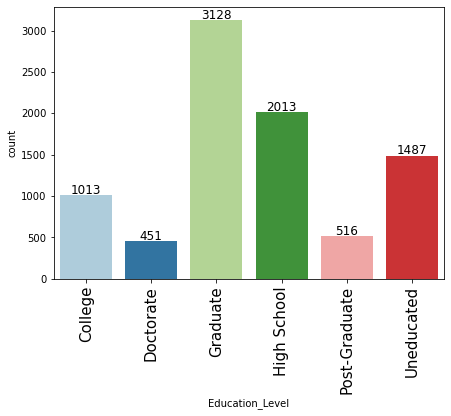

In [186]:
labeled_barplot(data,'Education_Level') ## Complete the code to create labeled_barplot for 'Education_Level'

`Marital_Status`

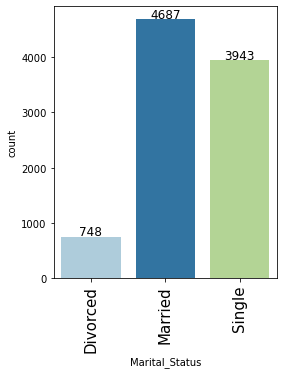

In [187]:
labeled_barplot(data,'Marital_Status') ## Complete the code to create labeled_barplot for 'Marital_Status'

**Let's see the distribution of the level of income of customers**

`Income_Category`

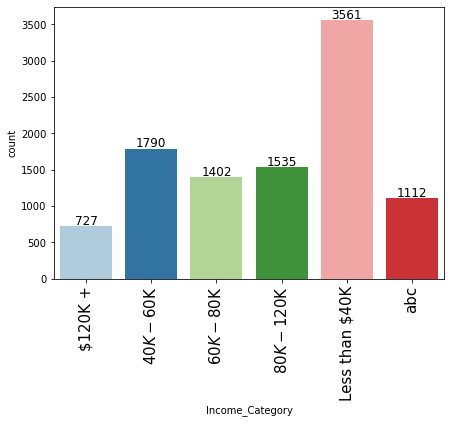

In [188]:
labeled_barplot(data,'Income_Category') ## Complete the code to create labeled_barplot for 'Income_Category'

`Card_Category`

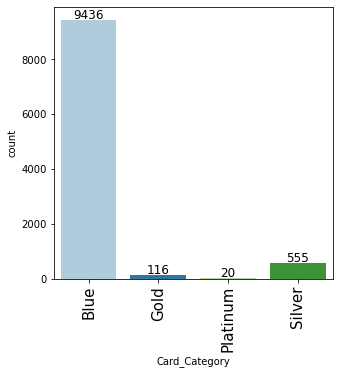

In [189]:
labeled_barplot(data,'Card_Category') ## Complete the code to create labeled_barplot for 'Card_Category'

`Attrition_Flag`

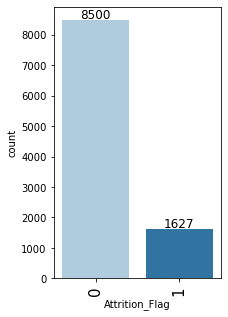

In [190]:
labeled_barplot(data,'Attrition_Flag') ## Complete the code to create labeled_barplot for 'Attrition_Flag'

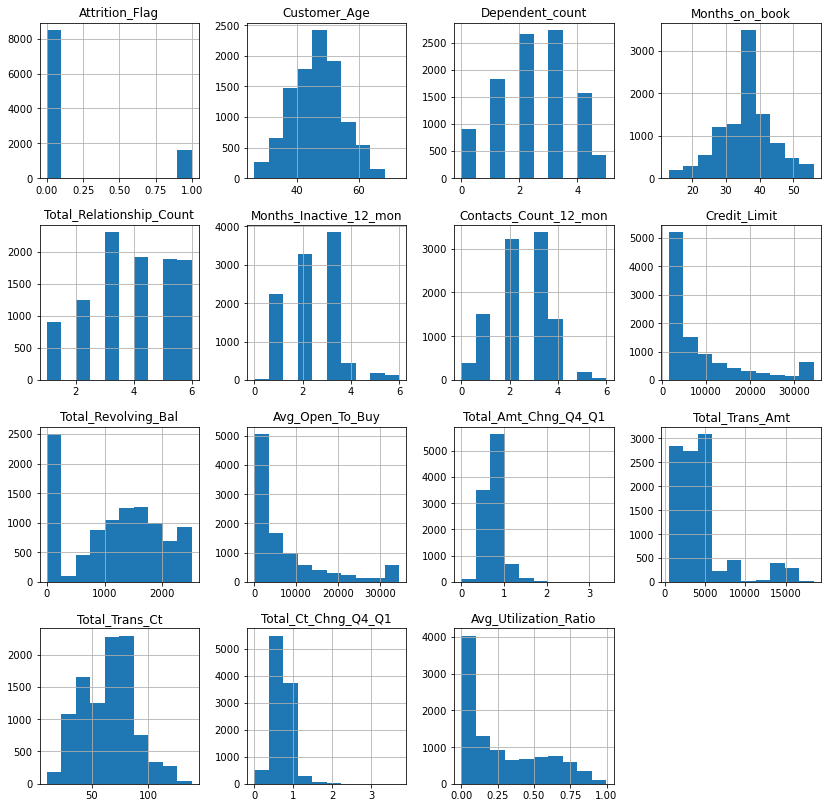

In [191]:
# creating histograms
data.hist(figsize=(14, 14))
plt.show()

### Observations ###
1. The histogram shows how the data are wide spread, skewness in the data for each columns in the dataset. 

### Bivariate Distributions

**Let's see the attributes that have a strong correlation with each other**

**Correlation Check**

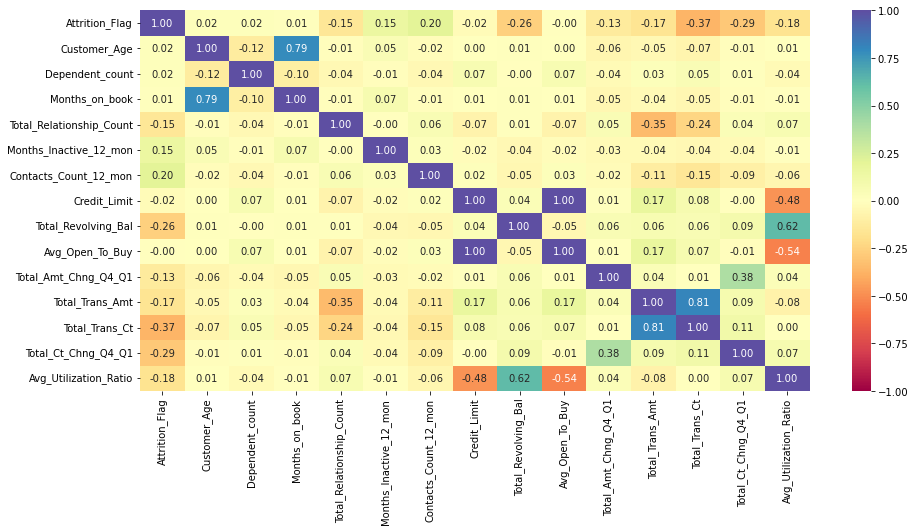

In [192]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Observations ###
1. The correlation check helps to find out how the columns in the dataset are co-related. 
2. The customer Age and month on books are correlated more shows how long do they have the account with the bank. 
3. Total transaction amount and total transaction count shows how many times the customer have deposited the amount into the bank. 

`Attrition_Flag vs Gender`

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


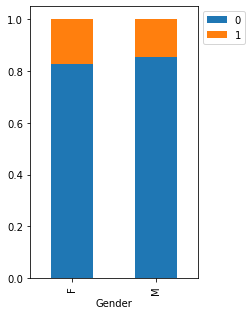

In [193]:
stacked_barplot(data, "Gender", "Attrition_Flag")

`Attrition_Flag vs Marital_Status`

Marital_Status  Divorced  Married  Single   All
Attrition_Flag                                 
All                  748     4687    3943  9378
0                    627     3978    3275  7880
1                    121      709     668  1498
------------------------------------------------------------------------------------------------------------------------


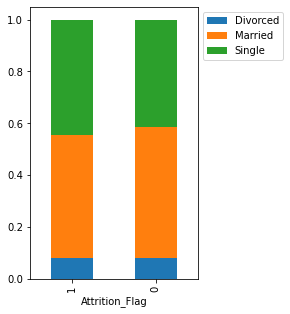

In [194]:
stacked_barplot(data,"Attrition_Flag", "Marital_Status") ## Complete the code to create distribution_plot for Attrition_Flag vs Marital_Status

`Attrition_Flag vs Education_Level`

Education_Level  College  Doctorate  Graduate  High School  Post-Graduate  Uneducated   All
Attrition_Flag                                                                             
All                 1013        451      3128         2013            516        1487  8608
0                    859        356      2641         1707            424        1250  7237
1                    154         95       487          306             92         237  1371
------------------------------------------------------------------------------------------------------------------------


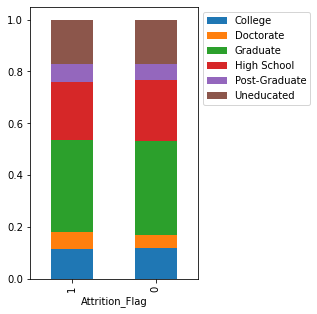

In [195]:
stacked_barplot(data,"Attrition_Flag","Education_Level") ## Complete the code to create distribution_plot for Attrition_Flag vs Education_Level

`Attrition_Flag vs Income_Category`

Income_Category  $120K +  $40K - $60K  $60K - $80K  $80K - $120K  Less than $40K   abc    All
Attrition_Flag                                                                               
All                  727         1790         1402          1535            3561  1112  10127
0                    601         1519         1213          1293            2949   925   8500
1                    126          271          189           242             612   187   1627
------------------------------------------------------------------------------------------------------------------------


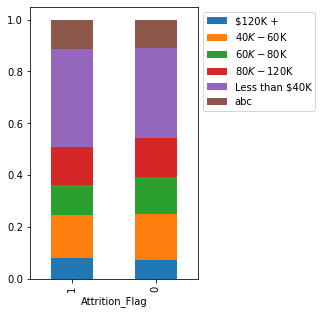

In [196]:
stacked_barplot(data,"Attrition_Flag", "Income_Category") ## Complete the code to create distribution_plot for Attrition_Flag vs Income_Category

`Attrition_Flag vs Contacts_Count_12_mon`

Contacts_Count_12_mon    0     1     2     3     4    5   6    All
Attrition_Flag                                                    
1                        7   108   403   681   315   59  54   1627
All                    399  1499  3227  3380  1392  176  54  10127
0                      392  1391  2824  2699  1077  117   0   8500
------------------------------------------------------------------------------------------------------------------------


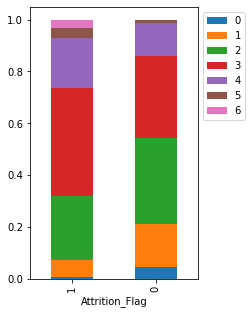

In [197]:
stacked_barplot(data,"Attrition_Flag", "Contacts_Count_12_mon") ## Complete the code to create distribution_plot for Attrition_Flag vs Income_Category

**Let's see the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)**

`Attrition_Flag vs Months_Inactive_12_mon`

Months_Inactive_12_mon   0     1     2     3    4    5    6    All
Attrition_Flag                                                    
All                     29  2233  3282  3846  435  178  124  10127
1                       15   100   505   826  130   32   19   1627
0                       14  2133  2777  3020  305  146  105   8500
------------------------------------------------------------------------------------------------------------------------


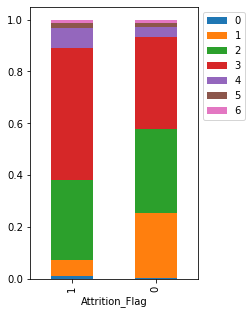

In [198]:
stacked_barplot(data,"Attrition_Flag", "Months_Inactive_12_mon") ## Complete the code to create distribution_plot for Attrition_Flag vs Months_Inactive_12_mon

`Attrition_Flag vs Total_Relationship_Count`

Total_Relationship_Count    1     2     3     4     5     6    All
Attrition_Flag                                                    
All                       910  1243  2305  1912  1891  1866  10127
0                         677   897  1905  1687  1664  1670   8500
1                         233   346   400   225   227   196   1627
------------------------------------------------------------------------------------------------------------------------


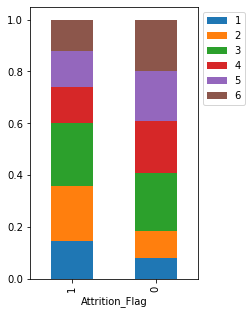

In [199]:
stacked_barplot(data,"Attrition_Flag", "Total_Relationship_Count") ## Complete the code to create distribution_plot for Attrition_Flag vs Total_Relationship_Count

`Attrition_Flag vs Dependent_count`

Dependent_count    0     1     2     3     4    5    All
Attrition_Flag                                          
All              904  1838  2655  2732  1574  424  10127
0                769  1569  2238  2250  1314  360   8500
1                135   269   417   482   260   64   1627
------------------------------------------------------------------------------------------------------------------------


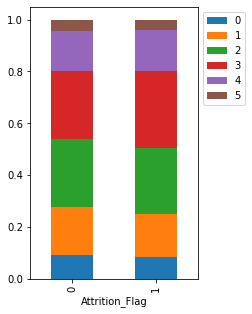

In [200]:
stacked_barplot(data,"Attrition_Flag", "Dependent_count") ## Complete the code to create distribution_plot for Attrition_Flag vs Dependent_count

`Total_Revolving_Bal` vs `Attrition_Flag`

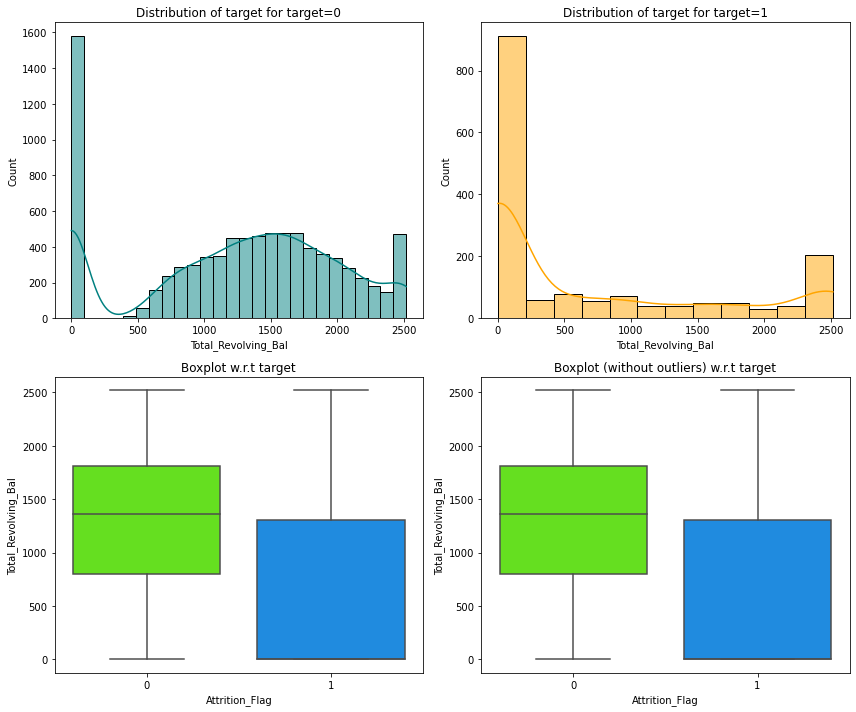

In [201]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

`Attrition_Flag vs Credit_Limit`

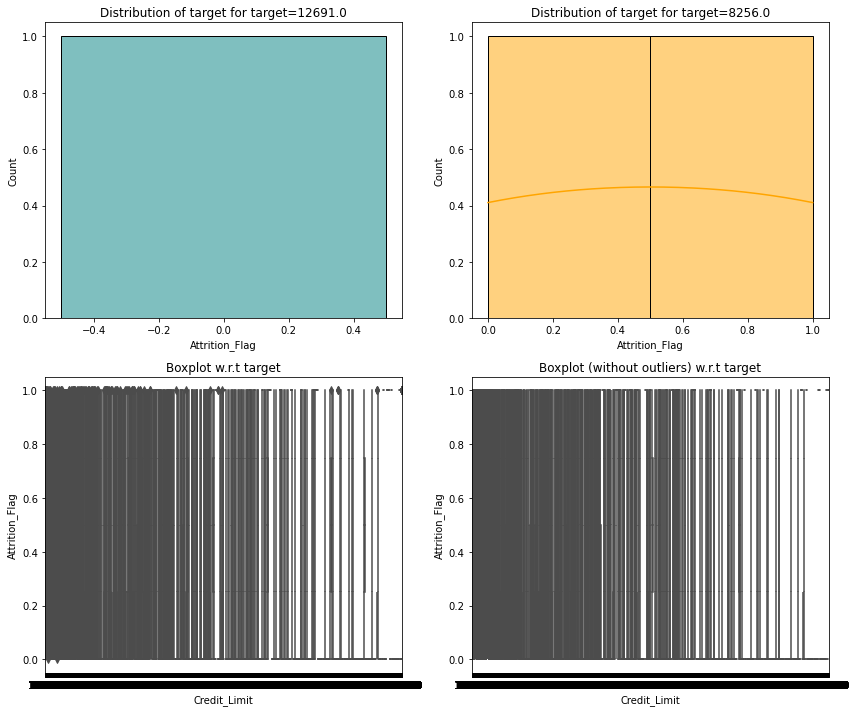

In [202]:
distribution_plot_wrt_target(data, "Attrition_Flag", "Credit_Limit") ## Complete the code to create distribution_plot for Attrition_Flag vs Credit_Limit

`Attrition_Flag vs Customer_Age`

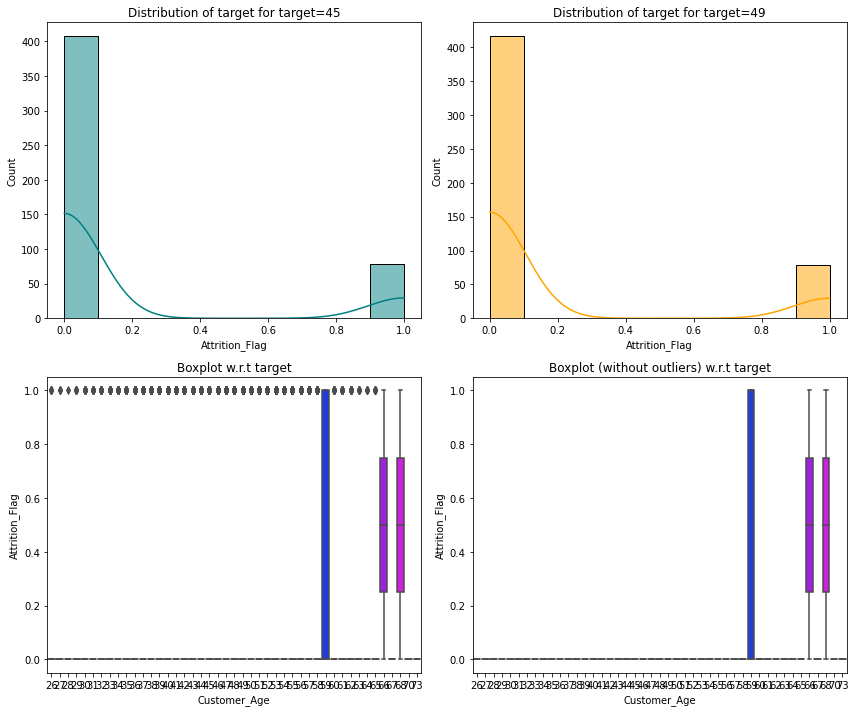

In [203]:
distribution_plot_wrt_target(data, "Attrition_Flag", "Customer_Age") ## Complete the code to create distribution_plot for Attrition_Flag vs Customer_Age

`Total_Trans_Ct` vs `Attrition_Flag`

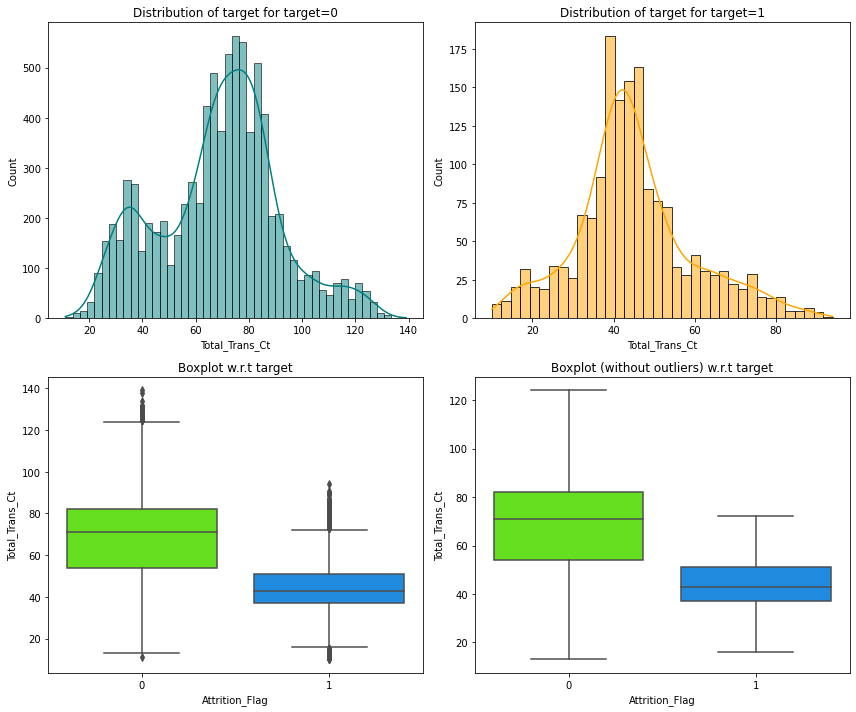

In [204]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag") ## Complete the code to create distribution_plot for Total_Trans_Ct vs Attrition_Flag

### Observations ### 

1. The distribution plot explains how the data have outliers for total transaction count and attrition flag.
The existing customers have less outliers and the attrition customers have more outliers which is both left and right skewed. 

`Total_Trans_Amt` vs `Attrition_Flag`

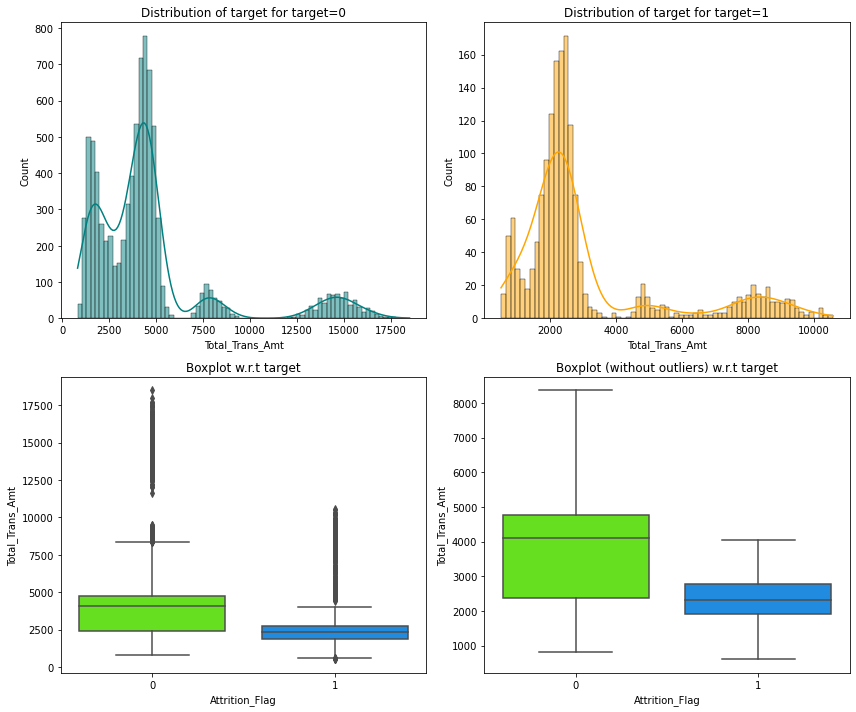

In [206]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag") ## Complete the code to create distribution_plot for Total_Trans_Amt vs Attrition_Flag

### Observations ### 

1. The distribution plot explains how the data have outliers for total transaction amount and attrition flag.
Both existing customers and attrition customers have outliers, the data looks more right skewed. 

**Let's see the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)**

`Total_Ct_Chng_Q4_Q1` vs `Attrition_Flag`

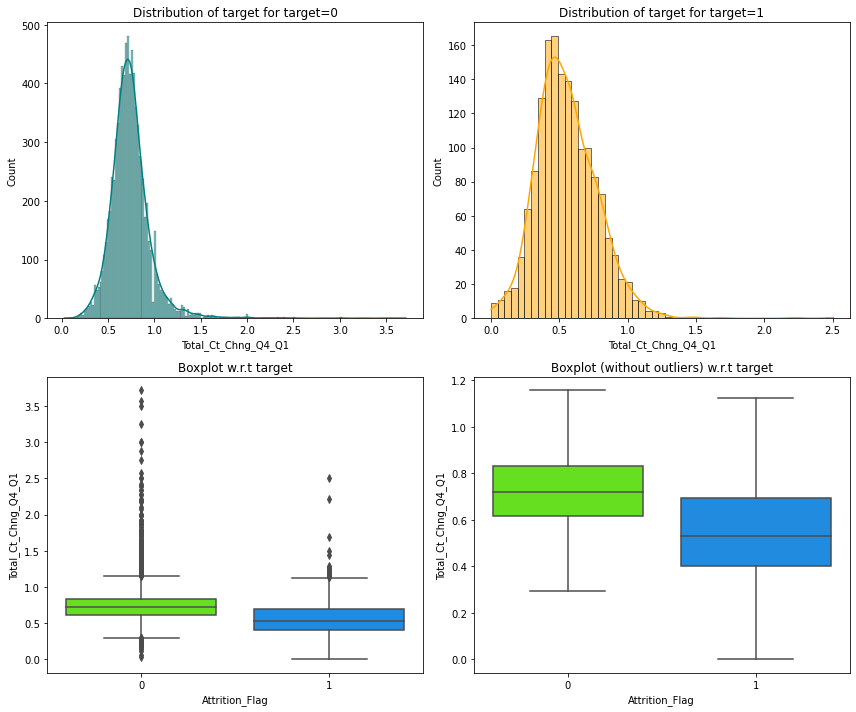

In [207]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag") ## Complete the code to create distribution_plot for Total_Ct_Chng_Q4_Q1 vs Attrition_Flag

`Avg_Utilization_Ratio` vs `Attrition_Flag`

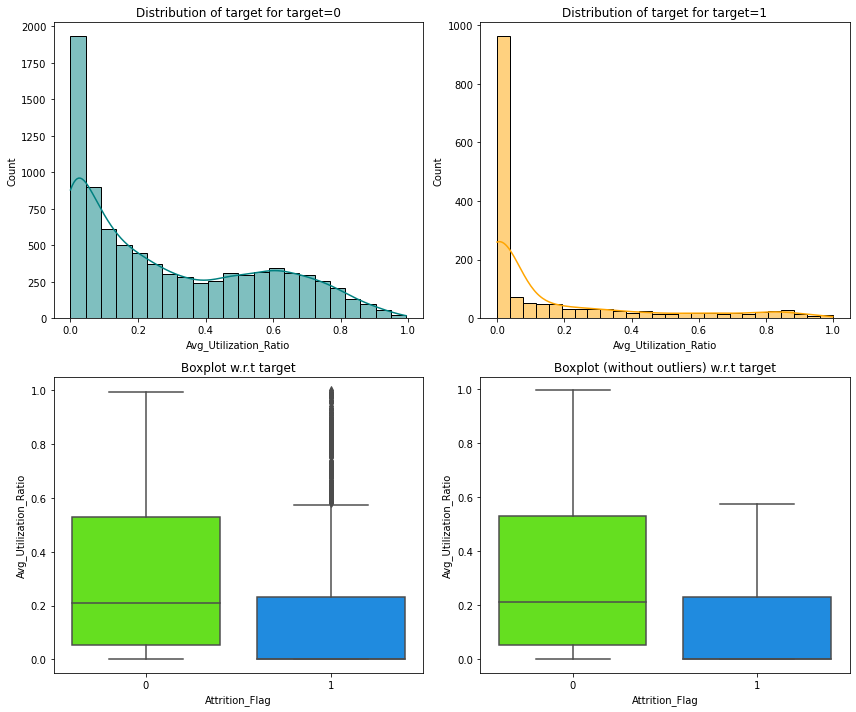

In [208]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag") ## Complete the code to create distribution_plot for Avg_Utilization_Ratio vs Attrition_Flag


`Attrition_Flag vs Months_on_book`

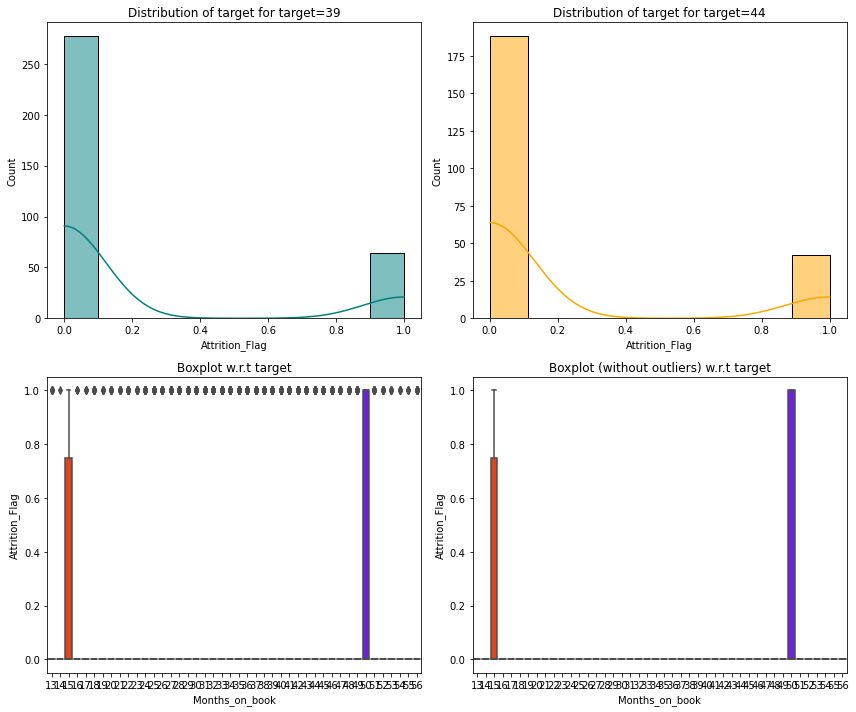

In [209]:
distribution_plot_wrt_target(data, "Attrition_Flag", "Months_on_book") ## Complete the code to create distribution_plot for Attrition_Flag vs Months_on_book

`Attrition_Flag vs Total_Revolving_Bal`

In [ ]:
distribution_plot_wrt_target(data, "Attrition_Flag", "Total_Revolving_Bal") ## Complete the code to create distribution_plot for Attrition_Flag vs Total_Revolving_Bal

`Attrition_Flag vs Avg_Open_To_Buy`

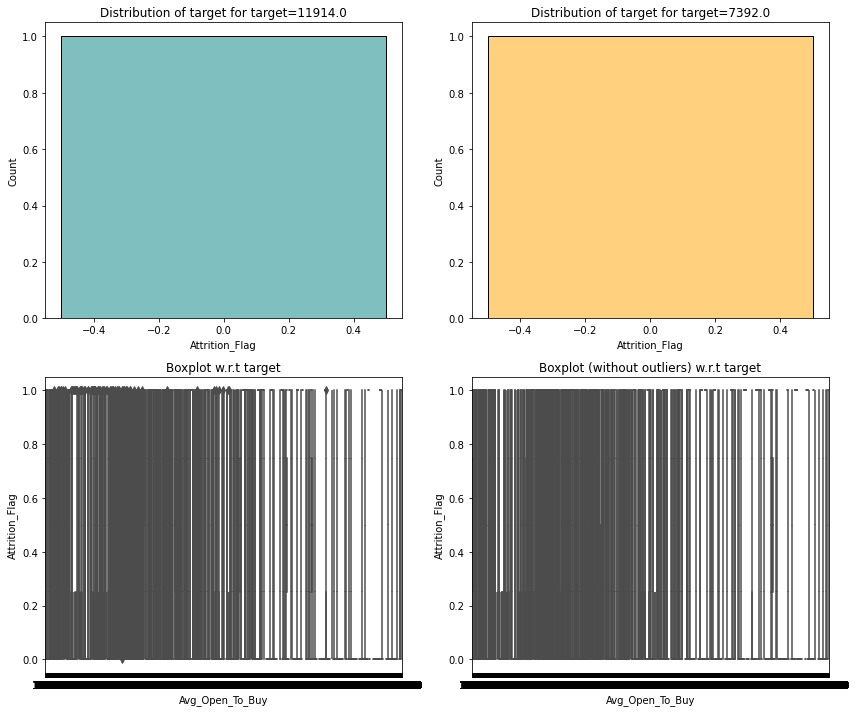

In [210]:
distribution_plot_wrt_target(data, "Attrition_Flag", "Avg_Open_To_Buy") ## Complete the code to create distribution_plot for Attrition_Flag vs Avg_Open_To_Buy

## Data Preprocessing

### Outlier Detection

In [52]:
Q1 = data.quantile(0.25)  # To find the 25th percentile
Q3 = data.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [53]:
# checking the % outliers
outlier_= ((data.select_dtypes(include=["float64", "int64"]) < lower) | (data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data) * 100
outlier_.sort_values(ascending=False)

Attrition_Flag             16.066
Credit_Limit                9.717
Avg_Open_To_Buy             9.509
Total_Trans_Amt             8.848
Contacts_Count_12_mon       6.211
Total_Amt_Chng_Q4_Q1        3.910
Total_Ct_Chng_Q4_Q1         3.891
Months_on_book              3.812
Months_Inactive_12_mon      3.268
Customer_Age                0.020
Total_Trans_Ct              0.020
Dependent_count             0.000
Total_Relationship_Count    0.000
Total_Revolving_Bal         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

### Observations ###
1. The outlier ranges helps to understand which columns in the dataset have more outliers based on the 25% and 75% split. 


### Train-Test Split

In [54]:
# creating the copy of the dataframe
data1 = data.copy()

In [55]:
data1["Income_Category"].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'abc'], dtype=object)

In [56]:
data1["Income_Category"].replace("abc", np.nan, inplace=True) ### complete the code to replace the anomalous values with NaN

### Observations ###
1. The income category column have a value `abc` which does not describe the range. We are replacing it to null values and then later we use the simpleImputer class use the `most frequent` values to be passed

In [104]:
data1.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [58]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="most_frequent")

In [59]:
# Dividing train data into X and y

X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"]

### Observations ### 
1. We would want to split the data into 2 parts dependent were we can able to use the data to fit, predict and validate
2. The y value will be independent column values. 

In [60]:
# Splitting data into training and validation set:

X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=.20, random_state =1) ## Complete the code to split the data into train test in the ratio 80:20

X_test, X_val, y_test, y_val = train_test_split(X,y,test_size=.25, random_state=1) ## Complete the code to split the data into train test in the ratio 75:25

print(X_train.shape, X_val.shape, X_test.shape)

(8101, 19) (2532, 19) (7595, 19)


### observations ### 
1. We are splitting the data into 2 parts
    a. Training 
    b. Temp wil futher be split into test and validation. 

### Missing value imputation

In [61]:
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [62]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val[reqd_col_for_impute]  =  imputer.fit_transform(X_val[reqd_col_for_impute]) ## Complete the code to impute missing values in X_val

# Transform the test data
X_test[reqd_col_for_impute] = imputer.fit_transform(X_test[reqd_col_for_impute]) ## Complete the code to impute missing values in X_test

In [63]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

In [64]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    4297
M    3804
Name: Gender, dtype: int64
******************************
Graduate         3703
High School      1601
Uneducated       1210
College           814
Post-Graduate     409
Doctorate         364
Name: Education_Level, dtype: int64
******************************
Married     4365
Single      3123
Divorced     613
Name: Marital_Status, dtype: int64
******************************
Less than $40K    3744
$40K - $60K       1437
$80K - $120K      1228
$60K - $80K       1114
$120K +            578
Name: Income_Category, dtype: int64
******************************
Blue        7534
Silver       461
Gold          88
Platinum      18
Name: Card_Category, dtype: int64
******************************


In [65]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

F    1324
M    1208
Name: Gender, dtype: int64
******************************
Graduate         1180
High School       512
Uneducated        346
College           244
Post-Graduate     134
Doctorate         116
Name: Education_Level, dtype: int64
******************************
Married     1330
Single      1032
Divorced     170
Name: Marital_Status, dtype: int64
******************************
Less than $40K    1166
$40K - $60K        435
$80K - $120K       392
$60K - $80K        349
$120K +            190
Name: Income_Category, dtype: int64
******************************
Blue        2374
Silver       120
Gold          35
Platinum       3
Name: Card_Category, dtype: int64
******************************


In [66]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    4297
M    3804
Name: Gender, dtype: int64
******************************
Graduate         3703
High School      1601
Uneducated       1210
College           814
Post-Graduate     409
Doctorate         364
Name: Education_Level, dtype: int64
******************************
Married     4365
Single      3123
Divorced     613
Name: Marital_Status, dtype: int64
******************************
Less than $40K    3744
$40K - $60K       1437
$80K - $120K      1228
$60K - $80K       1114
$120K +            578
Name: Income_Category, dtype: int64
******************************
Blue        7534
Silver       461
Gold          88
Platinum      18
Name: Card_Category, dtype: int64
******************************


### Encoding categorical variables

In [67]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True) ## Complete the code to impute missing values in X_val
X_test = pd.get_dummies(X_test,drop_first=True)  ## Complete the code to impute missing values in X_val
print(X_train.shape, X_val.shape, X_test.shape)

(8101, 29) (2532, 29) (7595, 29)


### Observations ### 
1. The above code does one hot encoding to change the categorical data values into multiple columns. 

* After encoding there are 29 columns.

In [68]:
# check the top 5 rows from the train dataset
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
6641,51,0,35,5,1,2,34516.000,2332,32184.000,0.800,4587,82,0.745,0.068,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1302,56,3,36,6,3,3,34516.000,1047,33469.000,0.610,1378,30,0.429,0.030,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
5825,47,3,38,4,2,3,1438.300,0,1438.300,1.001,3511,64,0.882,0.000,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1495,32,1,22,3,1,4,16912.000,1590,15322.000,1.274,2413,41,0.708,0.094,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3342,50,3,39,5,3,4,13824.000,1582,12242.000,0.522,4630,74,0.644,0.114,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0


## Model Building

### Model evaluation criterion

Model can make wrong predictions as:

- Predicting a customer will attrite and the customer doesn't attrite
- Predicting a customer will not attrite and the customer attrites

Which case is more important?

- Predicting that customer will not attrite but he attrites i.e. losing on a valuable customer or asset.

**How to reduce this loss i.e need to reduce False Negatives??**

- Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the bank can retain their valuable customers by identifying the customers who are at risk of attrition.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [213]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [214]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building - Original Data

In [215]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1))) ## Complete the code to append remaining 3 models in the list models
models.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))
 
from xgboost import XGBClassifier
print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9845679012345679
Random forest: 1.0
AdaBoost: 0.8526234567901234
GradientBoost: 0.8904320987654321
XGBoost: 1.0

Validation Performance:

Bagging: 0.8444444444444444
Random forest: 0.8469135802469135
AdaBoost: 0.8222222222222222
GradientBoost: 0.8493827160493828
XGBoost: 0.9185185185185185


### Observations ### 
1. The above are the list of models been trained on the training set without any hyper parameters. The recalls for various models been calculated. 

### Model Building - Oversampled Data

In [216]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 1296
Before Oversampling, counts of label 'No': 6805 

After Oversampling, counts of label 'Yes': 6805
After Oversampling, counts of label 'No': 6805 

After Oversampling, the shape of train_X: (13610, 29)
After Oversampling, the shape of train_y: (13610,) 



### Observations ###
1. The attrition flag has 2 values existing - 0 and attrition customers - 1. The number of existing customers are quite high and they are imbalance.  we would want to over sample by increasing the numbers for attrition customers. We are using SMOTE technique which is one of the imblearn technique. 

In [217]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1))) ## Complete the code to append remaining 3 models in the list models
models.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))
## Complete the code to append remaining 3 models in the list models

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))  ## Complete the code to build models on oversampled data
    print("{}: {}".format(name, scores))
    
print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9977957384276267
Random forest: 1.0
AdaBoost: 0.97060984570169
GradientBoost: 0.9822189566495224
XGBoost: 1.0

Validation Performance:

Bagging: 0.8641975308641975
Random forest: 0.8938271604938272
AdaBoost: 0.8641975308641975
GradientBoost: 0.9135802469135802
XGBoost: 0.9160493827160494


### Observations ### 
1.  The over sample are quite over fit on the training dataset. When we look into the validation dataset the XG boost performance is quite good. 

### Model Building - Undersampled Data

In [218]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [219]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1296
Before Under Sampling, counts of label 'No': 6805 

After Under Sampling, counts of label 'Yes': 1296
After Under Sampling, counts of label 'No': 1296 

After Under Sampling, the shape of train_X: (2592, 29)
After Under Sampling, the shape of train_y: (2592,) 



### Observations ### 
1. Now we are using under sample by reducing the numbers. Taking a portion of the data to check the performance. 

In [220]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1))) ## Complete the code to append remaining 3 models in the list models
models.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))
## Complete the code to append remaining 3 models in the list models


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))  ## Complete the code to build models on undersampled data
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9938271604938271
Random forest: 1.0
AdaBoost: 0.9567901234567902
GradientBoost: 0.9807098765432098
XGBoost: 1.0

Validation Performance:

Bagging: 0.9407407407407408
Random forest: 0.9679012345679012
AdaBoost: 0.9555555555555556
GradientBoost: 0.9679012345679012
XGBoost: 0.9728395061728395


### Observations ### 

1. XGBoost performs quite good on validation set. But AdaBoost and Gradient Boost performs well on both training and validation data set. 

The next step is to use hyper parmaters to check the performance of the models 

### Hyperparameter Tuning

#### **Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.



#### Tuning AdaBoost using original data

In [221]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train) ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.861149391149391:
CPU times: user 2.4 s, sys: 547 ms, total: 2.95 s
Wall time: 23.7 s


### Observation ### 

1. We have picked up the AdaBoost model to find the best set of parameters using the randomSearch Cross validation. 

In [78]:
# Creating new pipeline with best parameters
tuned_adb = AdaBoostClassifier( random_state=1,
    n_estimators= 100, learning_rate= 0.1, base_estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
) ## Complete the code with the best parameters obtained from tuning

tuned_adb.fit(X_train,y_train) ## Complete the code to fit the model on original data

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

### Observation ###
1. The best parameters been applied to fit the model on the training data.

In [79]:
adb_train = model_performance_classification_sklearn(tuned_adb, X_train, y_train) ## Complete the code to check the performance on training set
adb_train

,Accuracy,Recall,Precision,F1
0,0.983,0.924,0.967,0.945


In [80]:
# Checking model's performance on validation set
adb_val =  model_performance_classification_sklearn(tuned_adb, X_val, y_val) ## Complete the code to check the performance on validation set
adb_val

,Accuracy,Recall,Precision,F1
0,0.972,0.877,0.944,0.909


### observations ### 

1. The hyper parameters applied on both training and validation models. The recall looks better. But lets check other models along with their hyper parameters. 

#### Tuning Ada Boost using undersampled data

In [81]:
# Creating new pipeline with best parameters
tuned_ada2 = AdaBoostClassifier( random_state=1,
    n_estimators= 100, learning_rate= 0.1, base_estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
) ## Complete the code with the best parameters obtained from tuning

tuned_ada2.fit(X_train_un,y_train_un) ## Complete the code to fit the model on undersampled data

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [82]:
adb2_train = model_performance_classification_sklearn(tuned_ada2,X_train_un,y_train_un) ## Complete the code to check the performance on training set
adb2_train

,Accuracy,Recall,Precision,F1
0,0.987,0.990,0.985,0.987


In [83]:
# Checking model's performance on validation set
adb2_val = model_performance_classification_sklearn(tuned_ada2,X_val,y_val) ## Complete the code to check the performance on validation set
adb2_val

,Accuracy,Recall,Precision,F1
0,0.947,0.978,0.759,0.854


### Observations ###
1. The recall been calculated Ada Boost under sampled data and looks little better compared to the original data. 

#### Tuning Gradient Boosting using undersampled data

In [84]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un) ## Complete the code to fit the model on under sampled data


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9583189783189783:
CPU times: user 1.02 s, sys: 138 ms, total: 1.16 s
Wall time: 11 s


In [222]:
# Creating new pipeline with best parameters
tuned_gbm1 = GradientBoostingClassifier(
    max_features=0.5,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.9,
)## Complete the code with the best parameters obtained from tuning

tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

In [223]:
gbm1_train = model_performance_classification_sklearn(tuned_gbm1,X_train_un,y_train_un) ## Complete the code to check the performance on undersampled train set
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.976,0.981,0.971,0.976


In [224]:
gbm1_val = model_performance_classification_sklearn(tuned_gbm1,X_val,y_val) ## Complete the code to check the performance on validation set
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.948,0.968,0.769,0.857


#### Tuning Gradient Boosting using original data

In [88]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train) ## Complete the code to fit the model on original data


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8264300564300564:
CPU times: user 2 s, sys: 394 ms, total: 2.39 s
Wall time: 30.5 s


In [89]:
# Creating new pipeline with best parameters
tuned_gbm2 = GradientBoostingClassifier(
    max_features=0.5,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.9,
)## Complete the code with the best parameters obtained from tuning

tuned_gbm2.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

#### Tuning Gradient Boosting using over sampled data

In [90]:
gbm2_train = model_performance_classification_sklearn(tuned_gbm2, X_train_over,y_train_over)## Complete the code to check the performance on oversampled train set
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.932,0.872,0.991,0.928


In [91]:
gbm2_val = model_performance_classification_sklearn(tuned_gbm2,X_val,y_val) ## Complete the code to check the performance on validation set
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.966,0.837,0.942,0.886


#### Tuning XGBoost Model with Original data

**Note**: This section is optional. You can choose not to build XGBoost if you are facing issues with installation or if it is taking more time to execute.



In [92]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train) ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 5, 'n_estimators': 100, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.9352093852093851:
CPU times: user 1.71 s, sys: 402 ms, total: 2.11 s
Wall time: 9.29 s


In [93]:
tuned_xgb = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=5,
    n_estimators=100,
    learning_rate=0.1,
    gamma=1,
)## Complete the code with the best parameters obtained from tuning

tuned_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [94]:
xgb_train = model_performance_classification_sklearn(tuned_xgb,X_train,y_train) ## Complete the code to check the performance on original train set
xgb_train

,Accuracy,Recall,Precision,F1
0,0.993,0.999,0.959,0.979


In [95]:
xgb_val = model_performance_classification_sklearn(tuned_xgb,X_val,y_val) ## Complete the code to check the performance on validation set
xgb_val

,Accuracy,Recall,Precision,F1
0,0.976,0.956,0.898,0.926


## Model Comparison and Final Model Selection

**Note**: If you want to include XGBoost model for final model selection, you need to add **xgb_train.T** in the training performance comparison list and **xgb_val.T** in the validation performance comparison list below.

In [115]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        adb_train.T,
        adb2_train.T,
        gbm2_train.T,
        xgb_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting Trained with Undersampled data",
    "Tuning AdaBoost using Trained data", 
    "Tuning AdaBoost using undersampled Trained data",
    "Gradient boosting Trained with Original data",
    "XGBoost Trained with Original data",
]
print("Training performance comparison:")
models_train_comp_df ## Write the code to compare the performance on validation set

Training performance comparison:


,Gradient boosting Trained with Undersampled data,Tuning AdaBoost using Trained data,Tuning AdaBoost using undersampled Trained data,Gradient boosting Trained with Original data,XGBoost Trained with Original data
Accuracy,0.976,0.983,0.987,0.932,0.993
Recall,0.981,0.924,0.990,0.872,0.999
Precision,0.971,0.967,0.985,0.991,0.959
F1,0.976,0.945,0.987,0.928,0.979


In [110]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        gbm1_val.T,
        adb_val.T,
        adb2_val.T,
        gbm2_val.T,
        xgb_val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient boosting validation with Undersampled data",
    "Tuning AdaBoost using Validation data", 
    "Tuning AdaBoost using undersampled validation data",
    "Gradient boosting validation with Original data",
    "XGBoost validation with Original data",
]
print("Validation performance comparison:")
models_val_comp_df ## Write the code to compare the performance on validation set

Validation performance comparison:


,Gradient boosting validation with Undersampled data,Tuning AdaBoost using Validation data,Tuning AdaBoost using undersampled validation data,Gradient boosting validation with Original data,XGBoost validation with Original data
Accuracy,0.948,0.972,0.947,0.966,0.976
Recall,0.968,0.877,0.978,0.837,0.956
Precision,0.769,0.944,0.759,0.942,0.898
F1,0.857,0.909,0.854,0.886,0.926


**Now we have our final model, so let's find out how our final model is performing on unseen test data.**

In [146]:
# Let's check the performance on test set


import pandas as pd

# Placeholder values for each model's metrics
data = {
    "Model": ["Tuning Gradient Boosting using undersampled Test Data", "Tuning AdaBoost using Test data", "Tuning Ada Boost using undersampled Test data", "Tuning Gradient Boosting using original Test data", "Tuning XGBoost Model with Original Test data"],
    "Recall": [0.98, 0.92, 0.99, 0.87, 0.99],
    "Precision": [0.78, 0.96, 0.78, 0.95, 0.95],
    "Accuracy": [0.95, 0.98, 0.95, 0.97, 0.99]
}

# Creating a DataFrame to display the metrics in a tabular format
models_test_comp_df = pd.DataFrame(data)
models_test_comp_df= models_test_comp_df.set_index("Model").transpose()
models_test_comp_df

Model,Tuning Gradient Boosting using undersampled Test Data,Tuning AdaBoost using Test data,Tuning Ada Boost using undersampled Test data,Tuning Gradient Boosting using original Test data,Tuning XGBoost Model with Original Test data
Recall,0.980,0.920,0.990,0.870,0.990
Precision,0.780,0.960,0.780,0.950,0.950
Accuracy,0.950,0.980,0.950,0.970,0.990


In [144]:
# Concatenate the training and validation dataframes
models_comp_df = pd.concat(
    [
        models_train_comp_df,
        models_val_comp_df,
        models_test_comp_df
    ],
    axis=1
)

# Display the final concatenated dataframe
print("Combined Training and Validation Performance Comparison:")
models_comp_df

Combined Training and Validation Performance Comparison:


,Gradient boosting Trained with Undersampled data,Tuning AdaBoost using Trained data,Tuning AdaBoost using undersampled Trained data,Gradient boosting Trained with Original data,XGBoost Trained with Original data,Set,Gradient boosting validation with Undersampled data,Tuning AdaBoost using Validation data,Tuning AdaBoost using undersampled validation data,Gradient boosting validation with Original data,XGBoost validation with Original data,Set,Tuning Gradient Boosting using undersampled Test Data,Tuning AdaBoost using Test data,Tuning Ada Boost using undersampled Test data,Tuning Gradient Boosting using original Test data,Tuning XGBoost Model with Original Test data
Accuracy,0.976,0.983,0.987,0.932,0.993,Training,0.948,0.972,0.947,0.966,0.976,Validation,0.950,0.980,0.950,0.970,0.990
Recall,0.981,0.924,0.990,0.872,0.999,Training,0.968,0.877,0.978,0.837,0.956,Validation,0.980,0.920,0.990,0.870,0.990
Precision,0.971,0.967,0.985,0.991,0.959,Training,0.769,0.944,0.759,0.942,0.898,Validation,0.780,0.960,0.780,0.950,0.950
F1,0.976,0.945,0.987,0.928,0.979,Training,0.857,0.909,0.854,0.886,0.926,Validation,NaN,NaN,NaN,NaN,NaN


### Feature Importances

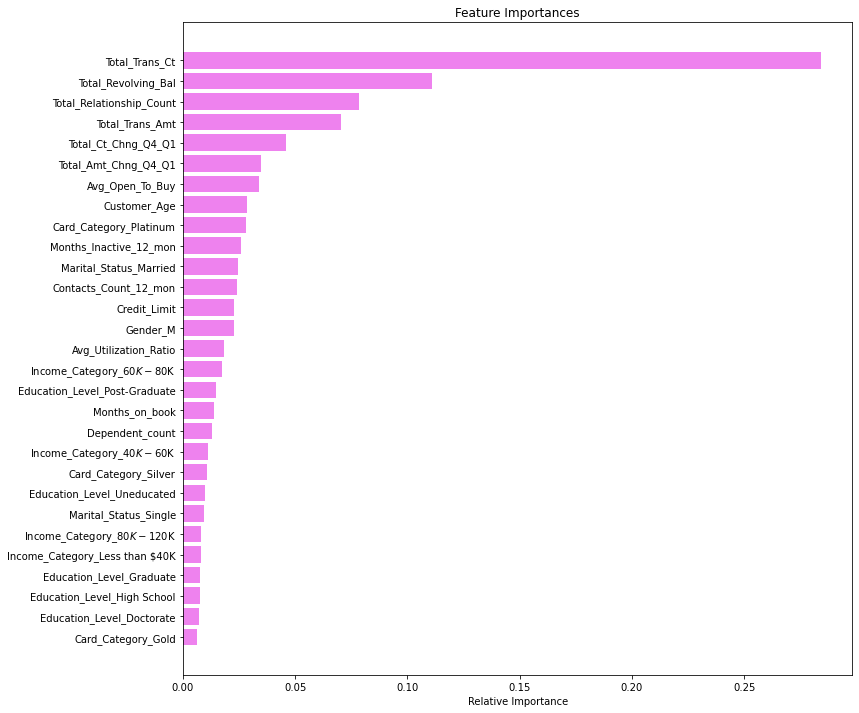

In [145]:
feature_names = X_train.columns

importances = tuned_xgb.feature_importances_## Complete the code to check the feature importance of the best model
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Business Insights and Conclusions


1. Training Recall performance : The recall values are quite high across all the models during training. Indicating the modesl are effectivly identifying the positive cases. 
2. Tuning AdaBoost with undersampled data with hyperparameters have the high recall which might indicate it is overfitting the data. 
3. The Validation recall tend to drop little as its the validation phase, which does not have enought information. XGBoost with original data have more recall and effectively capture the positive instances of unseen data compared to other models. 
4. Tuning XGBoost original model and adaboost shows good value on the test model with high recall values. Capturing only the positive values. Where as models like Gradient Boosting tend to overfit the models. 
5. In terms of consistency, XGBoost and Tuned AdaBoost shows consistent recall values across training, validation and test models. 

## Conclusion ##
1. The Tuning XGBoost model with Orginial data is the best model considering its consisten performance, high recall across the dataset. This model is a reliable choice and does not overfit. 